In [1]:
%matplotlib inline

import itertools
import matplotlib
import matplotlib.pyplot
import numpy
import pandas
import scipy.misc
import scipy.special
import scipy.stats
import seaborn

In [2]:
# colormap for data visualizations
cmap = seaborn.cubehelix_palette(n_colors = 6, start = 1.5, rot = 1.5,
                                gamma = 1.5, hue = 1.0, dark = 0.525,
                                light = 0.96, reverse = False, as_cmap = True)

The math for advisors is the same for poker hands. The advisor forum is five cards just like a poker hand.

In every game of SeaFall, some advisors will become substantially augmented by retired advisor stickers and owning one of these super-advisors can be game changing. Every game will lead to a different configuration of advisor upgrades, so the math presented here will treat the advisor deck as if no retired advisor stickers have been applied.

In [3]:
def advisor_forum_probabilities(bldr_num, xplr_num, mrch_num, sldr_num):
    """
    Find the probability at least 1 guild "X" advisor is in the forum to start the game.
    The method returns a 4 element tuple with a probability for each guild.
    The 4 element tuple has the order (builders, explorers, merchants, soldiers).
    """
    deck_size = bldr_num + xplr_num + mrch_num + sldr_num
    
    total_forum_hands = scipy.misc.comb(deck_size, 5)
    
    p_bldr = 1 - scipy.misc.comb(deck_size - bldr_num, 5) / total_forum_hands
    
    p_xplr = 1 - scipy.misc.comb(deck_size - xplr_num, 5) / total_forum_hands
    
    p_mrch = 1 - scipy.misc.comb(deck_size - mrch_num, 5) / total_forum_hands
    
    p_sldr = 1 - scipy.misc.comb(deck_size - sldr_num, 5) / total_forum_hands
    
    advisor_prob = (p_bldr, p_xplr, p_mrch, p_sldr)
    
    return advisor_prob

A table that enumerates the advisor deck and the guilds. The order of the *Totals* reflects the order that advisors were revealed in a single play through and will not reflect everyones experience.

| Advisor Origin | Builders | Explorers | Merchants (+sell) | Soldiers | Total |
| :--- | ---: | ---: | ---: | ---: | ---: |
| Starter | 5 | 5 | 5 (3)| 5 | 20 |
| **Total I** | **5** | **5** | **5 (3)** | **5** | **20** |
| Dangerous Waters | 3 | 5 | 2 (1) | 6 | 16 |
| **Total II** | **8** | **10** | **7 (4)** | **11** | **36** |
| Tombs | 0 | 6 | 0 | 0 | 6 |
| **Total III** | **8** | **16** | **7 (4)** | **11** | **42** |
| Colonies | 6 | 0 | 10 (8) | 0 | 16 |
| **Total IV** | **14** | **16** | **17 (12)** | **11** | **58** |

An Excel file in the SeaFall folder contains all the details for each advisor and can be used to generate the above table.

In [4]:
advisor_prob_I = advisor_forum_probabilities(5, 5, 5, 5)
advisor_prob_II = advisor_forum_probabilities(8, 10, 7, 11)
advisor_prob_III = advisor_forum_probabilities(8, 16, 7, 11)
(_,_,advisor_prob_IV_sell,_) = advisor_forum_probabilities(19, 16, 12, 11)
advisor_prob_IV = advisor_forum_probabilities(14, 16, 17, 11)

In [5]:
print(advisor_prob_I)
print(advisor_prob_II)
print(advisor_prob_III)
print(advisor_prob_IV_sell)
print(advisor_prob_IV)

(0.80630804953560375, 0.80630804953560375, 0.80630804953560375, 0.80630804953560375)
(0.73930481283422456, 0.82551353874883282, 0.68499331550802145, 0.85906862745098045)
(0.6728970644246639, 0.92267253499602664, 0.61837990849544122, 0.80026167670583592)
0.700846944949
(0.76298985010418763, 0.81435040055729713, 0.83645154334809502, 0.66523348601388532)


# A look at Stage IV
At this point in the game, the deck of advisors is about size of a standard deck of playing cards. 

# The Guild Hall
The Guild Hall is a unique structure and enables a particularly powerful gameplay mechanic. When a strategy absolutely depends on a specific advisor, the Guild Hall is the solution to acquiring them. One only needs consider how much coin to budget to have a reasonable chance at finding the desired advisor. Again poker math comes into play...

In [6]:
df_advisor = pandas.read_excel("advisors.xlsx")

In [7]:
df_advisor

,name,reputation_cost,coin_cost,guild,buy_goods,sell_goods,tax,raid,explore,research,upgrade,build,set,stage,ability
0,The Dockmaster,1,3,merchants,1,1,0,0,0,0,0,0,starter,1,"When taking the buy goods action, goods cost -..."
1,The Master Trader,1,3,merchants,0,1,0,0,0,0,0,0,starter,1,"When selling goods, each earns +2 gold."
2,The Renowned Merchant,1,4,merchants,2,1,0,0,0,0,0,0,starter,1,Gain a glory if you earn 18+ gold selling good...
3,The Smuggler,1,2,merchants,2,0,0,0,0,0,0,0,starter,1,"When you take the buy goods action, treat your..."
4,The Brute,1,1,merchants,1,0,1,0,0,0,0,0,starter,1,"After buying goods, you may return one other g..."
5,The Captain,1,3,explorers,0,0,0,0,1,0,0,0,starter,1,Your support ship adds +1 die to endeavors.
6,The Carpenter,1,2,builders,0,0,0,0,0,0,-2,-2,starter,1,Wood provides a discount of 12 gold instead of 8.
7,The Convict,1,1,builders,0,0,0,2,0,0,0,-2,starter,1,"When you would exhaust the Convict, instead di..."
8,The Foreman,1,3,builders,0,0,0,0,0,0,-4,-4,starter,1,"At the end of your turn, before exhausting the..."
9,The Local Guide,1,2,explorers,0,0,0,0,1,0,0,0,starter,1,"During an endeavor, you may re-roll all your d..."


In [8]:
df_now = df_advisor.loc[(df_advisor["buy_goods"] >= 2) & (df_advisor["guild"].isin(["merchants"]))]

In [9]:
len(df_now)

11

In [10]:
def advisor_guild_hall_probabilities(hand_size, suit_size, deck_size):
    """
    Find the probability at least 1 desired "X" advisor is in the forum when the forum is refreshed by the Guild Hall.
    * hand_size = the number of cards drawn into the forum, e.g. 5
    * suit_size = the number of cards that satisfy a set of conditions, e.g. the number of merchants guild advisors.
    * deck_size = the number of cards in the advisor deck.
    
    Note the deck_size should reflect the number of unknown cards in the deck.
    """
    
    if hand_size > deck_size:
        
        advisor_prob = 1.0
        
        return advisor_prob
    
    if suit_size > deck_size:
        
        advisor_prob = 1.0
        
        return advisor_prob
    
    if suit_size == 0:
        
        advisor_prob = 0.0
        
        return advisor_prob
    
    total_forum_hands = scipy.misc.comb(deck_size, hand_size)
    
    advisor_prob = 1 - scipy.misc.comb(deck_size - suit_size, hand_size) / total_forum_hands
    
    return advisor_prob

It is very likely that each player will have reserved an advisor card from a previous game. However, given the variable number of players and a chance the winner of the prior game did not reserve and advisor, the deck_size will not be adjusted for these random variable for simplicity. Therefore, the numbers in the chart below are approximations. On the whole the numbers will be underestimates of the actual probability, unless the cards being reserved by the players are concentrated for a particular suit.

In [11]:
# Stage IV advisors
advisor_conditions = {"buy_goods >= 1" : 1,
                     "buy_goods >= 2" : 2,
                     "sell_goods >= 1" : 1,
                     "sell_goods >= 2" : 2,
                     "tax >= 1" : 1,
                     "raid >= 1" : 1,
                     "raid >= 2" : 2,
                     "raid >= 3" : 3,
                     "explore >= 1" : 1,
                     "explore >= 2" : 2,
                     "explore >= 3" : 3,
                     "research >= 1" : 1,
                     "upgrade <= -2" : -2,
                     "upgrade <= -4" : -4,
                     "build <= -2" : -2,
                     "build <= -4" : -4,
                     "any 1 card" : 0}

advisor_keys = ["buy_goods >= 1",
                "buy_goods >= 2",
                "sell_goods >= 1",
                "sell_goods >= 2",
                "tax >= 1",
                "raid >= 1",
                "raid >= 2",
                "raid >= 3",
                "explore >= 1",
                "explore >= 2",
                "explore >= 3",
                "research >= 1",
                "upgrade <= -2",
                "upgrade <= -4",
                "build <= -2",
                "build <= -4",
                "any 1 card"]

In [12]:
df_stage_4 = df_advisor.loc[(df_advisor["stage"] <= 4)]

deck_size = len(df_stage_4)

coin_range = numpy.arange(11)

hand_size = 5

probs_dict = {}

# "buy_goods >= 1"

suit_size = len(df_stage_4.loc[(df_stage_4["buy_goods"] >= 1)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["buy_goods >= 1"] = probs

# "buy_goods >= 2"

suit_size = len(df_stage_4.loc[(df_stage_4["buy_goods"] >= 2)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["buy_goods >= 2"] = probs

# "sell_goods >= 1"

suit_size = len(df_stage_4.loc[(df_stage_4["sell_goods"] >= 1)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["sell_goods >= 1"] = probs

# "sell_goods >= 2"

suit_size = len(df_stage_4.loc[(df_stage_4["sell_goods"] >= 2)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["sell_goods >= 2"] = probs

# "tax >= 1"

suit_size = len(df_stage_4.loc[(df_stage_4["tax"] >= 1)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["tax >= 1"] = probs

# "raid >= 1"

suit_size = len(df_stage_4.loc[(df_stage_4["raid"] >= 1)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["raid >= 1"] = probs

# "raid >= 2"

suit_size = len(df_stage_4.loc[(df_stage_4["raid"] >= 2)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["raid >= 2"] = probs

# "raid >= 3"

suit_size = len(df_stage_4.loc[(df_stage_4["raid"] >= 3)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["raid >= 3"] = probs

# "explore >= 1"

suit_size = len(df_stage_4.loc[(df_stage_4["explore"] >= 1)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["explore >= 1"] = probs

# "explore >= 2"

suit_size = len(df_stage_4.loc[(df_stage_4["explore"] >= 2)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["explore >= 2"] = probs

# "explore >= 3"

suit_size = len(df_stage_4.loc[(df_stage_4["explore"] >= 3)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["explore >= 3"] = probs

# "research >= 1"

suit_size = len(df_stage_4.loc[(df_stage_4["research"] >= 1)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["research >= 1"] = probs

# "upgrade <= -2"

suit_size = len(df_stage_4.loc[(df_stage_4["upgrade"] <= -2)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["upgrade <= -2"] = probs

# "upgrade <= -4"

suit_size = len(df_stage_4.loc[(df_stage_4["upgrade"] <= -4)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["upgrade <= -4"] = probs

# "build <= -2"

suit_size = len(df_stage_4.loc[(df_stage_4["build"] <= -2)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["build <= -2"] = probs

# "build <= -4"

suit_size = len(df_stage_4.loc[(df_stage_4["build"] <= -4)])

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["build <= -4"] = probs

# "any 1 card"

suit_size = 1

probs = []

for i in coin_range:
    
    probs.append(advisor_guild_hall_probabilities(hand_size*(i+1), suit_size, deck_size))

probs_dict["any 1 card"] = probs

In [13]:
probs_df = pandas.DataFrame.from_dict(probs_dict)
probs_df.index = coin_range

In [14]:
# Probability sanity check. These scenarios are the same...
# The probability of getting the desired card within the first 10 cards drawn
p1 = advisor_guild_hall_probabilities(10, 11, 58)
# The probability of drawing the card in the first 5 cards, OR
# The prob of not drawing the card in the first 5 AND the prob of drawing the card in the 2nd round of 5 cards
p2 = advisor_guild_hall_probabilities(5, 11, 58) + \
(1-advisor_guild_hall_probabilities(5, 11, 58))*advisor_guild_hall_probabilities(5, 11, 53)
print(p1)
print(p2)

0.900764313533
0.900764313533


The single card odds turn out to have a straightforward interpretation in terms of probability. The probability of drawing any single card from a deck can be thought of as flipping a weighted coin. The balance of the coin is the number of cards being drawn. At first I thought of the problem by drawing one card at a time. However, the math is trivial if the problem is about dividing the deck into two stacks. The first stack contains the number of cards to be drawn in total. Each card in the deck has an equal probability of being the one desired card. Then it is plain to see that the probability of the card being in the first stack is just the number of cards in the stack times the probability any given card is the desired card, which is 1 dividing by the number of cards in the deck. For example, if half the cards are drawn then there is a 50-50 chance that the desired card will be drawn, just like flipping a coin. Looking at the math, each additional card drawn contributes a fixed probability, 1/(the number of cards in the deck), to the chances of drawing that card in the first n cards.

In [15]:
# Probability sanity check. These scenarios are the same...
# Getting a single desired card in the first 55 cards drawn
p1 = advisor_guild_hall_probabilities(55, 1, 58)
# 1 minus NOT getting the single desired card 55 times in a row
p2 = 1-scipy.misc.factorial(57)/scipy.misc.factorial(2)/scipy.misc.factorial(58)*scipy.misc.factorial(3)
print(p1)
print(p2)

0.948275862069
0.948275862069


In [17]:
mask = probs_df.as_matrix()
mask = mask > .9999 # I think a mask cleans up the chart. Few

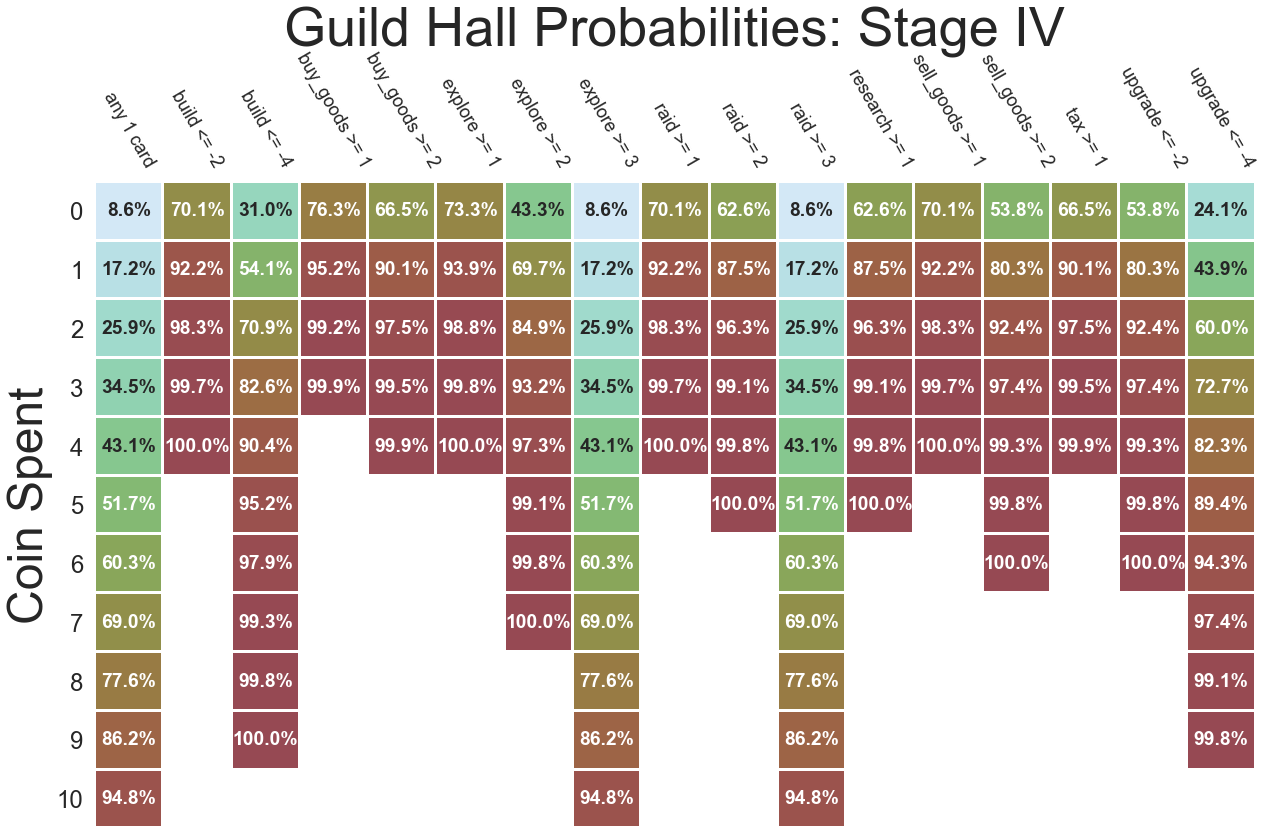

In [18]:
seaborn.set(style = "white")
seaborn.set_context("poster")
matplotlib.pyplot.figure(figsize=(18, 12))

ax = seaborn.heatmap(probs_df, annot = True, cmap = cmap,
                     cbar = False, mask = mask, annot_kws = {"weight" : "extra bold"},
                     fmt = ".1%", linewidths = 2, vmin=0.0, 
                     vmax=1.0)
ax.set_title(
    "Guild Hall Probabilities: Stage IV", 
    fontsize=54,
    y=1.20)
ax.set_ylabel("Coin Spent", fontsize=48)
ax.xaxis.tick_top()
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=24)
matplotlib.pyplot.setp(ax.get_xticklabels(), rotation=-60)
matplotlib.pyplot.setp(ax.get_yticklabels(), rotation=0)
matplotlib.pyplot.tight_layout()
fig = ax.get_figure()
fig.savefig("guild_hall_probabilities_stage_iv.pdf")
fig.savefig("guild_hall_probabilities_stage_iv.svg", format="svg", dpi=1200)